In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# === Step 1: Load and Clean Data ===
df = pd.read_csv("Weekly.csv")

In [5]:
# Drop non-numeric and label columns
df_clean = df.drop(columns=["Direction", "Year"])

In [6]:
# Check for missing values
if df_clean.isnull().sum().sum() > 0:
    print("Missing values found, filling with mean...")
    df_clean = df_clean.fillna(df_clean.mean())

In [7]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [8]:
# === Step 2: Apply K-Means Clustering ===
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
# === (Optional) Analyze Clusters vs Actual Direction ===
df['Direction_Code'] = df['Direction'].map({'Up': 1, 'Down': 0})
comparison = pd.crosstab(df['Cluster'], df['Direction_Code'])

In [10]:
print("Cluster vs Actual Direction:")
print(comparison)

Cluster vs Actual Direction:
Direction_Code    0    1
Cluster                 
0               396  503
1                88  102


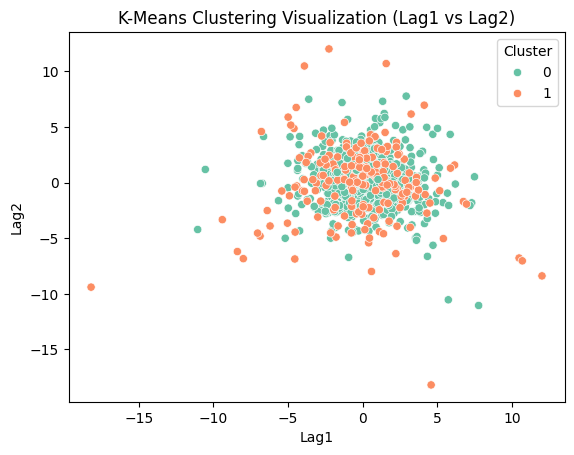

In [11]:
sns.scatterplot(data=df, x='Lag1', y='Lag2', hue='Cluster', palette='Set2')
plt.title("K-Means Clustering Visualization (Lag1 vs Lag2)")
plt.show()